## **Import Library**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-forecasting-datavidia/sample_submission.csv
/kaggle/input/weather-forecasting-datavidia/test_hourly.csv
/kaggle/input/weather-forecasting-datavidia/train.csv
/kaggle/input/weather-forecasting-datavidia/test.csv
/kaggle/input/weather-forecasting-datavidia/train_hourly.csv


## **Load Data**

In [ ]:
# https://drive.google.com/file/d/1--edBcj3l3ZmB5vqfb1RX-eS2iNPy5SW/view?usp=sharing
    
# https://drive.google.com/file/d/1-21Qdzygv-gbTPzwPBQ2p855EHITCXXp/view?usp=sharing

In [ ]:
# # Downloading Train Data from Gdrive
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--edBcj3l3ZmB5vqfb1RX-eS2iNPy5SW' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--edBcj3l3ZmB5vqfb1RX-eS2iNPy5SW" -O train_merge.csv && rm -rf /tmp/cookies.txt

# # Downloading Train Data from Gdrive
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-21Qdzygv-gbTPzwPBQ2p855EHITCXXp' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-21Qdzygv-gbTPzwPBQ2p855EHITCXXp" -O test_merge.csv && rm -rf /tmp/cookies.txt

In [ ]:
# Downloading Train Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FyDZNehFWEuksafYZFDGmSVLWe5kUZxO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FyDZNehFWEuksafYZFDGmSVLWe5kUZxO" -O train_merge.csv && rm -rf /tmp/cookies.txt

# Downloading Train Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1A4DHE7L_rhbZeKTPdO9efbrCqR4Rnt9D' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1A4DHE7L_rhbZeKTPdO9efbrCqR4Rnt9D" -O test_merge.csv && rm -rf /tmp/cookies.txt

--2023-01-18 11:13:50--  https://docs.google.com/uc?export=download&confirm=t&id=1FyDZNehFWEuksafYZFDGmSVLWe5kUZxO
Resolving docs.google.com (docs.google.com)... 172.253.123.113, 172.253.123.102, 172.253.123.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r1ub3v5lsapf586bes5rbmpubo5af8s9/1674040425000/04113043774517021280/*/1FyDZNehFWEuksafYZFDGmSVLWe5kUZxO?e=download&uuid=a59c93ce-e45e-4477-9ded-5b34ba1a9dcb [following]
--2023-01-18 11:13:50--  https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/r1ub3v5lsapf586bes5rbmpubo5af8s9/1674040425000/04113043774517021280/*/1FyDZNehFWEuksafYZFDGmSVLWe5kUZxO?e=download&uuid=a59c93ce-e45e-4477-9ded-5b34ba1a9dcb
Resolving doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)... 142.251.162.

In [ ]:
train = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/train.csv")
train_hourly = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/train_hourly.csv")
train_merged = pd.read_csv("train_merge.csv")

test = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/test.csv")
test_hourly = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/test_hourly.csv")
test_merged = pd.read_csv("test_merge.csv")

submission  = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/sample_submission.csv")

In [ ]:
test_w = pd.read_csv("/kaggle/input/weather-forecasting-datavidia/test_hourly.csv")
test_w[test_w["city"]=="su"]

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2021-08-02T00:00,26.1,73.0,21.0,31.0,1010.9,1013.2,0.0,5.0,5.0,...,0.90,27.4,30.7,29.2,28.6,0.056,0.078,0.113,0.234,su
1,2021-08-02T01:00,25.6,75.0,20.8,31.0,1010.3,1012.6,0.0,5.0,5.0,...,0.82,26.9,30.6,29.2,28.6,0.056,0.078,0.113,0.234,su
2,2021-08-02T02:00,25.2,77.0,20.9,30.7,1010.3,1012.6,0.0,2.0,2.0,...,0.73,26.4,30.4,29.2,28.6,0.056,0.078,0.113,0.234,su
3,2021-08-02T03:00,24.7,78.0,20.7,30.1,1010.2,1012.5,0.0,9.0,10.0,...,0.68,25.9,30.3,29.2,28.6,0.056,0.078,0.113,0.234,su
4,2021-08-02T04:00,24.2,80.0,20.6,30.2,1010.7,1013.0,0.0,7.0,3.0,...,0.59,25.5,30.1,29.2,28.6,0.056,0.078,0.113,0.234,su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2022-12-22T19:00,26.1,89.0,24.1,31.1,1005.7,1008.0,0.0,76.0,0.0,...,0.38,27.2,28.8,29.0,28.9,0.311,0.304,0.281,0.299,su
12116,2022-12-22T20:00,26.1,88.0,23.9,31.0,1006.4,1008.7,0.0,79.0,0.0,...,0.42,27.0,28.6,29.0,28.9,0.308,0.304,0.282,0.299,su
12117,2022-12-22T21:00,25.9,88.0,23.8,30.6,1007.0,1009.3,0.0,77.0,1.0,...,0.38,26.8,28.5,29.0,28.9,0.305,0.304,0.282,0.299,su
12118,2022-12-22T22:00,25.7,89.0,23.7,30.5,1007.2,1009.5,0.0,76.0,4.0,...,0.37,26.7,28.3,29.0,28.9,0.302,0.304,0.282,0.299,su


In [ ]:
train.shape

(13258, 16)

In [ ]:
train_merged.shape

(13198, 743)

## **Data Pre-processing - Feature engineering**

In [ ]:
# Change time type to datetime
train["time_"] = pd.to_datetime(train["time"])
train_hourly["time_"] = pd.to_datetime(train_hourly["time"])
train["sunrise (iso8601)"] = pd.to_datetime(train["sunrise (iso8601)"])
train["sunset (iso8601)"] = pd.to_datetime(train["sunset (iso8601)"])
test["time_"] = pd.to_datetime(test["time"])
test_hourly["time_"] = pd.to_datetime(test_hourly["time"])
test["sunrise (iso8601)"] = pd.to_datetime(test["sunrise (iso8601)"])
test["sunset (iso8601)"] = pd.to_datetime(test["sunset (iso8601)"])

In [ ]:
train_merged["id_"] = train_merged["city"].astype(str)+train_merged["dayofyear"].astype(str)+train_merged["year"].astype(str)
test_merged["id_"] = test_merged["city"].astype(str)+test_merged["dayofyear"].astype(str)+test_merged["year"].astype(str)

In [ ]:
del_col = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'elevation', 'city','dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear',
       'sunrise_sunset_diff_hours', 'sunrise_sunset_diff_minutes',
       'sunrise_sunset_diff_seconds']

In [ ]:
del_col_ = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'shortwave_radiation_sum (MJ/m²)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'elevation', 'city','dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear',
       'sunrise_sunset_diff_hours', 'sunrise_sunset_diff_minutes',
       'sunrise_sunset_diff_seconds']

In [ ]:
train_merged = train_merged.drop(columns=del_col)
test_merged = test_merged.drop(columns=del_col_)

In [ ]:
train["dayofyear"] = train["time_"].dt.dayofyear.astype(int)
test["dayofyear"] = test["time_"].dt.dayofyear.astype(int)
train["year"] = train["time_"].dt.year.astype(int)
test["year"] = test["time_"].dt.year.astype(int)

In [ ]:
train["id_"] = train["city"].astype(str)+train["dayofyear"].astype(str)+train["year"].astype(str)
test["id_"] = test["city"].astype(str)+test["dayofyear"].astype(str)+test["year"].astype(str)

In [ ]:
train = pd.merge(train,train_merged,left_on="id_",right_on="id_",how="left")
test = pd.merge(test,test_merged,left_on="id_",right_on="id_",how="left")

In [ ]:
# Sort Values 
train = train.sort_values(["city","time_"])
train_hourly = train_hourly.sort_values(["city","time_"])
test = test.sort_values(["city","time_"])
test_hourly = test_hourly.sort_values(["city","time_"])

In [ ]:
train["winddirection_10m_dominant (°)"] = train["winddirection_10m_dominant (°)"].ffill()
test["winddirection_10m_dominant (°)"] = test["winddirection_10m_dominant (°)"].ffill()

In [ ]:
del_time = train[train["rain_sum (mm)"].isnull()]["time"]
train = train[~train["time"].isin(del_time)]

In [ ]:
train["label"] = "train"
test["label"] = "test"

In [ ]:
df = pd.concat([train,test]).sort_values(by=["time_","city"]).reset_index(drop=True)
#df = df[~df["rain_sum (mm)"].isnull()]

In [ ]:
# Menambah Kolom Tanggal/Bulan/Tahun
df["hari"] = df["time_"].dt.dayofweek.astype(int)
df["is_weekend"] = (df["time_"].dt.dayofweek.astype(int)>5).map({True:1,False:0})
#df["haripadatahun"] = df["time_"].dt.dayofyear.astype(int)
df["pekanpadatahun"] = df["time_"].dt.weekofyear.astype(int)
df["pekan"] = df["time_"].dt.week.astype(int)
df["tanggal"] = df["time_"].dt.day.astype(int)
df["bulan"] = df["time_"].dt.month.astype(int)
#df["tahun"] = df["time_"].dt.year.astype(int)
df["quarter"] = df["time_"].dt.quarter.astype(int)
df["quarter"] = df["time_"].dt.quarter.astype(int)
df["is_month_start"] = df["time_"].dt.is_month_start.astype(int)
df["is_month_end"] = df["time_"].dt.is_month_end.astype(int)
df["is_quarter_end"] = df["time_"].dt.is_quarter_end.astype(int)
df["is_quarter_start"] = df["time_"].dt.is_quarter_start.astype(int)
df["is_year_end"] = df["time_"].dt.is_year_end.astype(int)
df["is_year_start"] = df["time_"].dt.is_year_start.astype(int)
df["is_leap_year"] = df["time_"].dt.is_leap_year.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df["city_bulan"] = df["city"]+df["bulan"].astype(str)

mean_city = df.groupby("city")["rain_sum (mm)"].mean()
df['mean_rain_city'] = df["city"].map(mean_city).fillna(0)

mean_city_month = df.groupby(["city_bulan"])["rain_sum (mm)"].mean()
df['mean_rain_city_month'] = df["city_bulan"].map(mean_city_month).fillna(0)

df=df.drop(columns="city_bulan")

In [ ]:
# Night and Day Length in Minutes
df["day_length"] = (df["sunset (iso8601)"]-df["sunrise (iso8601)"]).dt.seconds.astype(int)/60

In [ ]:
q_day = df[(df["day_length"]!=0) & (df["city"]=="q")][["time_","day_length"]].sort_values(by="time_")
q_day["time"] = q_day["time_"]
q_day = q_day.set_index("time_")

In [ ]:
q_day["quarter"] = q_day["time"].dt.quarter.astype(int)
mean_day_length = q_day.groupby("quarter")["day_length"].mean().reset_index()

In [ ]:
index_0 = df[df["day_length"]==0].index

In [ ]:
index_0 = df[df["day_length"]==0].index
for i in np.array(index_0) :
    if df.loc[i,"quarter"] == 1 :
        df.loc[i,"day_length"] = 561.147368
    elif df.loc[i,"quarter"] == 2 :
        df.loc[i,"day_length"] = 1108.078947
    elif df.loc[i,"quarter"] == 3 :
        df.loc[i,"day_length"] = 946.060870
    elif df.loc[i,"quarter"] == 4 :
        df.loc[i,"day_length"] = 415.848837

In [ ]:
df["night_length"] = 1440-df["day_length"]

In [ ]:
# sel =['hari','is_weekend', 'haripadatahun', 'pekanpadatahun', 'pekan',
#        'tanggal', 'bulan', 'tahun', 'quarter', 'is_month_start',
#        'is_month_end', 'is_quarter_end', 'is_quarter_start',
#        'is_year_end', 'is_year_start', 'is_leap_year', 'day_length',
#        'night_length','time_', 'sunrise (iso8601)', 'sunset (iso8601)', 'elevation', 'city',"id_","label","id","time","rain_sum (mm)"]

In [ ]:
# df=df[sel]

In [ ]:
train_ = df[df["time_"]<="2021-07-31"]
test_ = df[df["time_"]>"2021-07-31"]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
# One Hot Encoding

cat_features = ['city']

train = train_#[train_["city"]=="q"]
test = test_#[test_["city"]=="q"]

for feature in cat_features:
    a = pd.get_dummies(train[feature], prefix = feature)
    frames = [train, a]
    train=pd.concat(frames, axis = 1)
    
    b = pd.get_dummies(test[feature], prefix = feature)
    frames = [test, b]
    test = pd.concat(frames, axis = 1)
    

#flight.drop(cat_features, axis = 1, inplace=True)
#df_test.drop(cat_features, axis = 1, inplace=True)

In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()

train = train_#.sample(train.shape[0])
test = test_#.sample(test.shape[0])

id_test = test["id"]
id_test_ = test["id_"]

X = train.drop(columns=["id","time_","time","sunset (iso8601)","sunrise (iso8601)","rain_sum (mm)","city","id_","label"])
X_test = test.drop(columns=["id","time_","time","sunset (iso8601)","sunrise (iso8601)","city","id_","label","rain_sum (mm)"])
y = train[["rain_sum (mm)"]]

# X = train.drop(columns=["city","rain_sum (mm)"])
# X_test = test.drop(columns=['city'])
# y = train[["rain_sum (mm)"]]

X_norm = pd.DataFrame(scale.fit_transform(X.values), columns=X.columns, index=X.index)
X_test_norm = pd.DataFrame(scale.transform(X_test.values), columns=X_test.columns, index=X_test.index)

In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    col_miss = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return col_miss

## **Feature Selection**

In [ ]:
#ANOVA test
from sklearn.feature_selection import f_regression

f_score, p_value = f_regression(X_norm,y)
f_test = pd.DataFrame()
f_test["Variabel"] = X_norm.columns
f_test["f_score"] = f_score
f_test["p_value"] = p_value
f_test = f_test.sort_values(by=["f_score"],ascending=False)
f_test

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variabel,f_score,p_value
748,mean_rain_city_month,8617.056396,0.000000
290,relativehumidity_2m (%)_13,6106.003156,0.000000
289,relativehumidity_2m (%)_12,6051.368718,0.000000
291,relativehumidity_2m (%)_14,5941.885898,0.000000
288,relativehumidity_2m (%)_11,5820.753315,0.000000
...,...,...,...
742,is_quarter_end,0.055494,0.813769
655,winddirection_10m (°)_18,0.033908,0.853905
636,winddirection_100m (°)_23,0.013835,0.906369
741,is_month_end,0.002635,0.959064


In [ ]:
sel = np.array(f_test[f_test["p_value"]<0.05]["Variabel"])

In [ ]:
X_norm = X_norm[sel]
X_test_norm = X_test_norm[sel]

## **Modeling**

### XGBoost Tuning with Bayesian Optimization

In [ ]:
# XGBoost Bayesian
from scipy.stats import randint
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error, f1_score, make_scorer, mean_squared_error

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaYStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

In [ ]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Classifier/Regressor
from xgboost import XGBRegressor, DMatrix

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer


In [ ]:
# Setting the basic regressor
reg = XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', tree_method='gpu_hist')

In [ ]:
from time import time

import pprint
"""
A wrapper for measuring time and performances of different optmizers

optimizer = a sklearn or a skopt optimizer
X = the training set 
y = our target
title = a string label for the experiment
"""
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# 5-fold StratifiedCV
kf = tscv

# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)

# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }

opt = BayesSearchCV(estimator=reg,
                    search_spaces=search_spaces,
                    scoring=scoring,
                    cv=kf,
                    n_jobs=1,
                    n_iter=20,
                    return_train_score=False,
                    refit=True,
                    iid=False,                                        # if not iid it optimizes on the cv score                                                               
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0,
                    verbose=100)

In [ ]:
# best_params = report_perf(opt, X_norm, y,'XGBoost', 
# #best_params = report_perf(opt, trainx, trainy,'CatBoost', 
#                           callbacks=[DeltaYStopper(0.0001)])

In [ ]:
# XGBoost took 2615.51 seconds,  candidates checked: 20, best CV score: -4.584 ± 0.798
# Best parameters:
# OrderedDict([('colsample_bytree', 0.1),
#              ('learning_rate', 0.08410426488242996),
#              ('max_depth', 5),
#              ('n_estimators', 4394),
#              ('reg_alpha', 50.21955821931944),
#              ('reg_lambda', 50.76313957565786),
#              ('subsample', 0.9364324253427057)])

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree=0.1,
                          learning_rate=0.08410426488242996,
                          max_depth=5,
                          n_estimators=4394,
                          reg_alpha=50.21955821931944,
                          reg_lambda=50.76313957565786,
                          subsample=0.9364324253427057,
                    tree_method='gpu_hist')

In [ ]:
from xgboost import plot_importance, plot_tree

In [ ]:
xgb_tuned.fit(X_norm,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08410426488242996, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=4394, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=50.21955821931944,
             reg_lambda=50.76313957565786, ...)

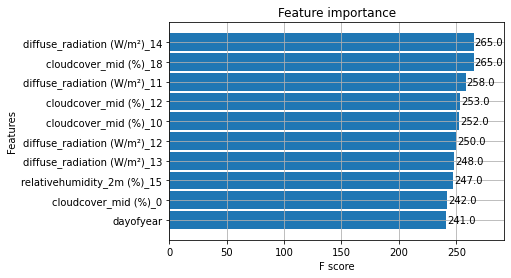

In [ ]:
_ = plot_importance(xgb_tuned, height=0.9 ,max_num_features = 10)

In [ ]:
y_pred = xgb_tuned.predict(X_test_norm)

In [ ]:
test["rain_sum (mm)"]=y_pred

## **Evaluating**

In [ ]:
def cv_mse(model, X, y):
    mse = (-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (mse)

score = cv_mse(xgb_tuned,X_norm,y)
print("XGB Tuned: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGB Tuned: 21.6500 (7.4557)



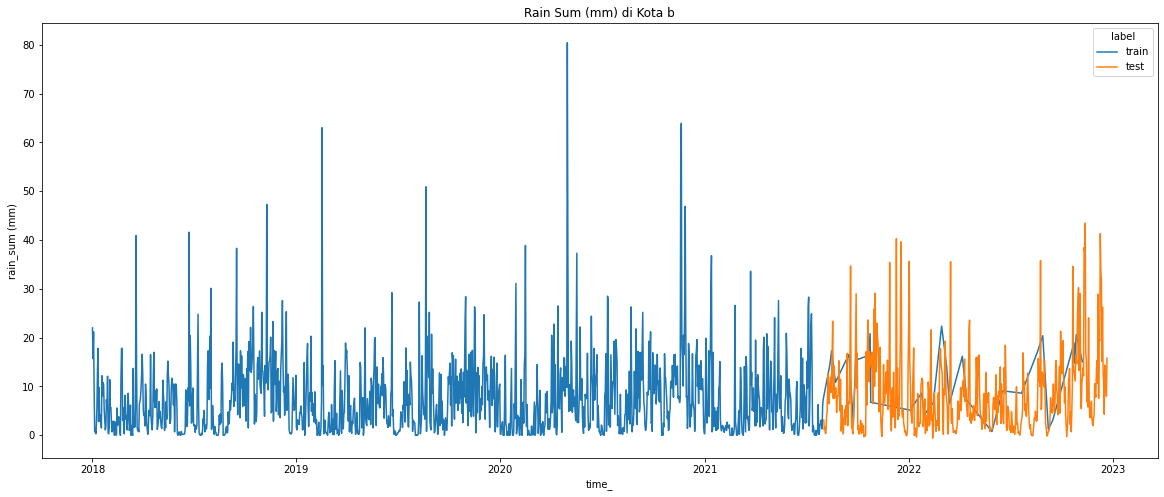

<Figure size 432x288 with 0 Axes>

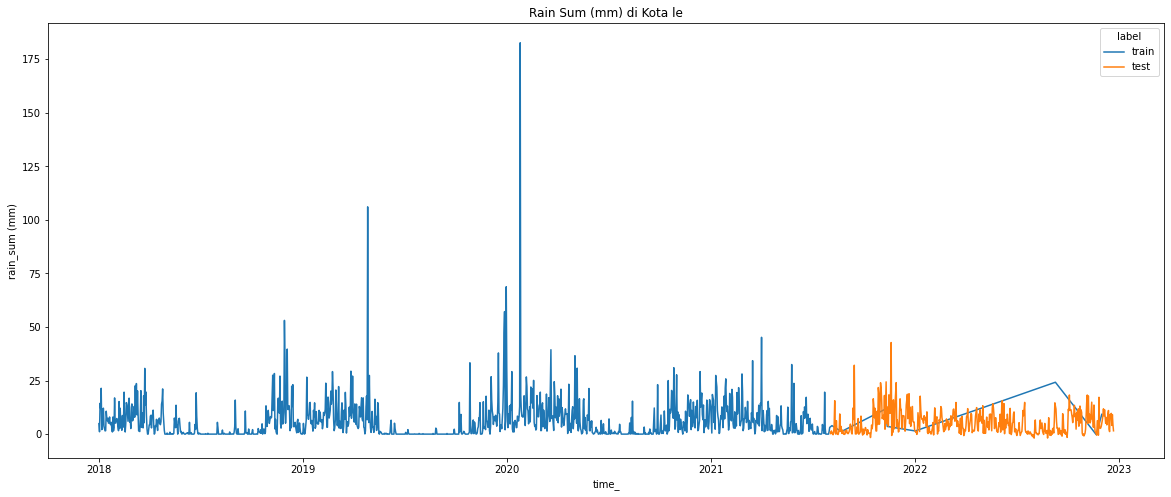

<Figure size 432x288 with 0 Axes>

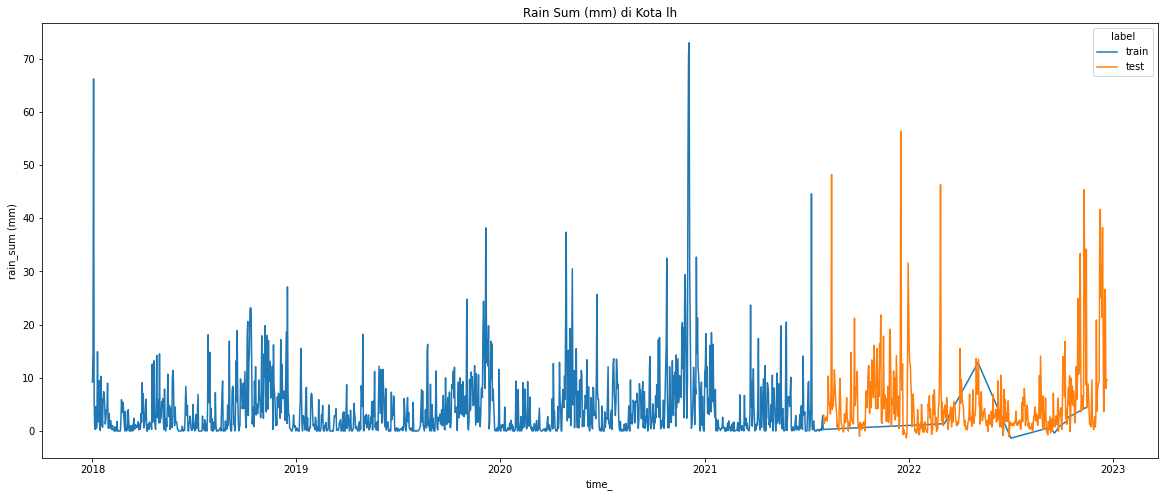

<Figure size 432x288 with 0 Axes>

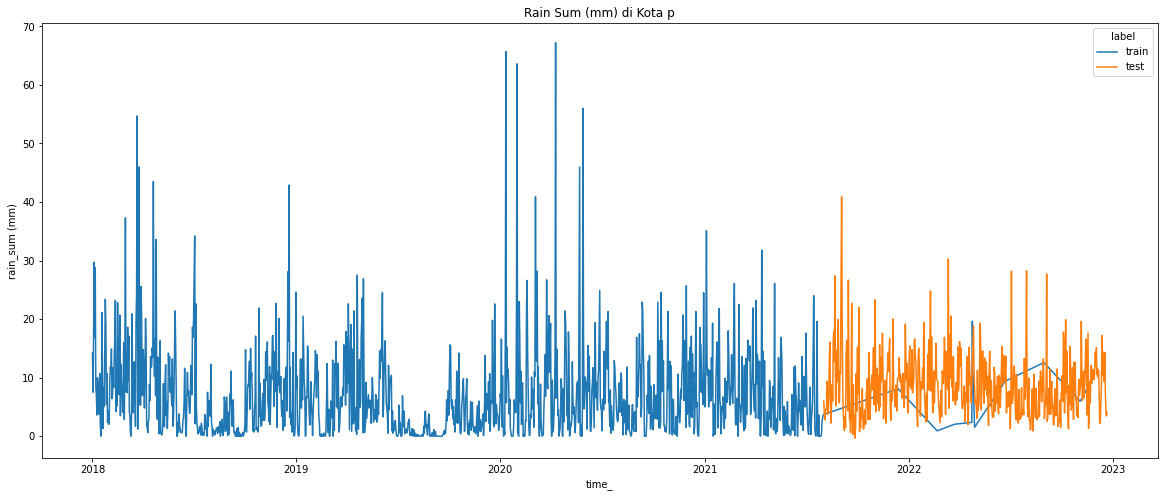

<Figure size 432x288 with 0 Axes>

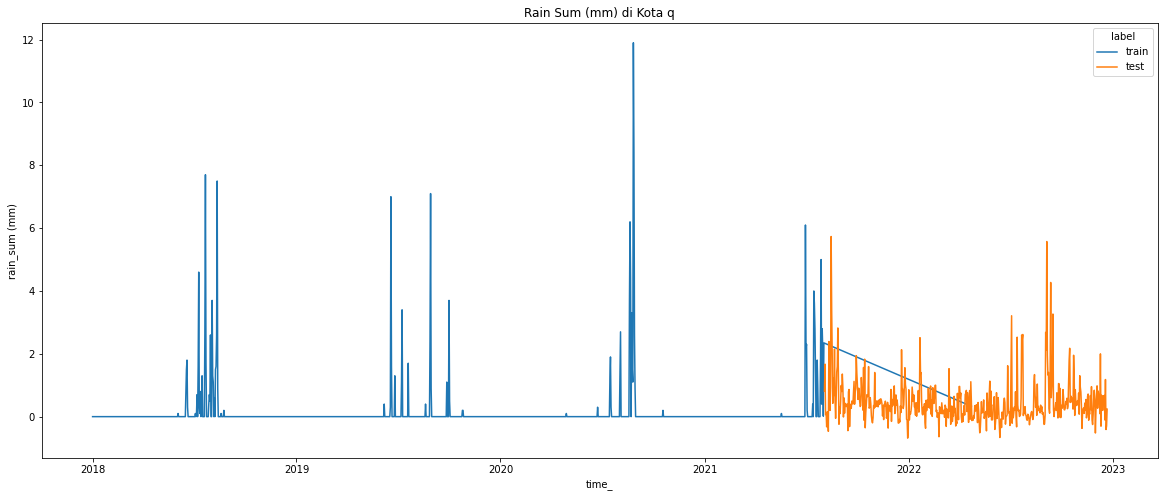

<Figure size 432x288 with 0 Axes>

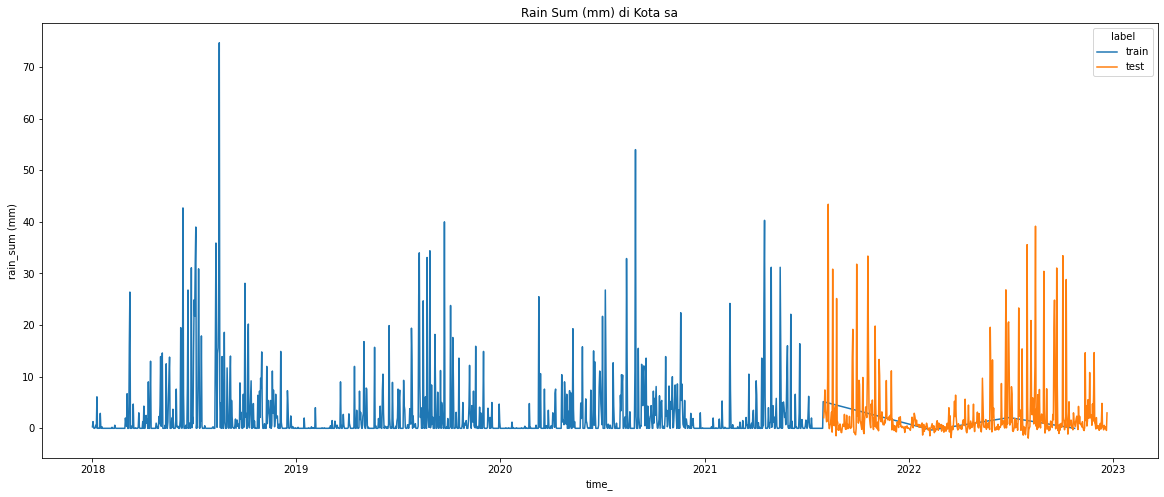

<Figure size 432x288 with 0 Axes>

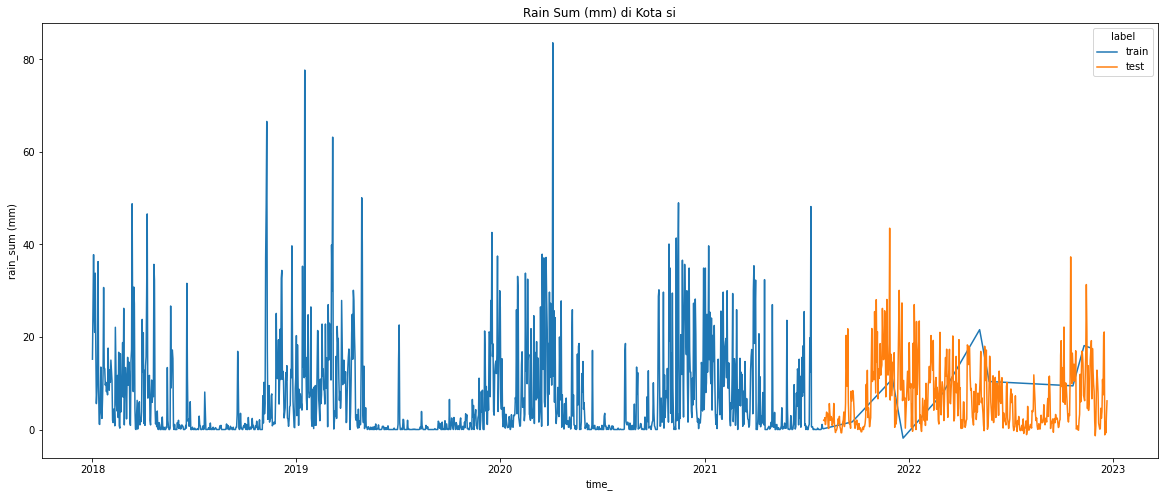

<Figure size 432x288 with 0 Axes>

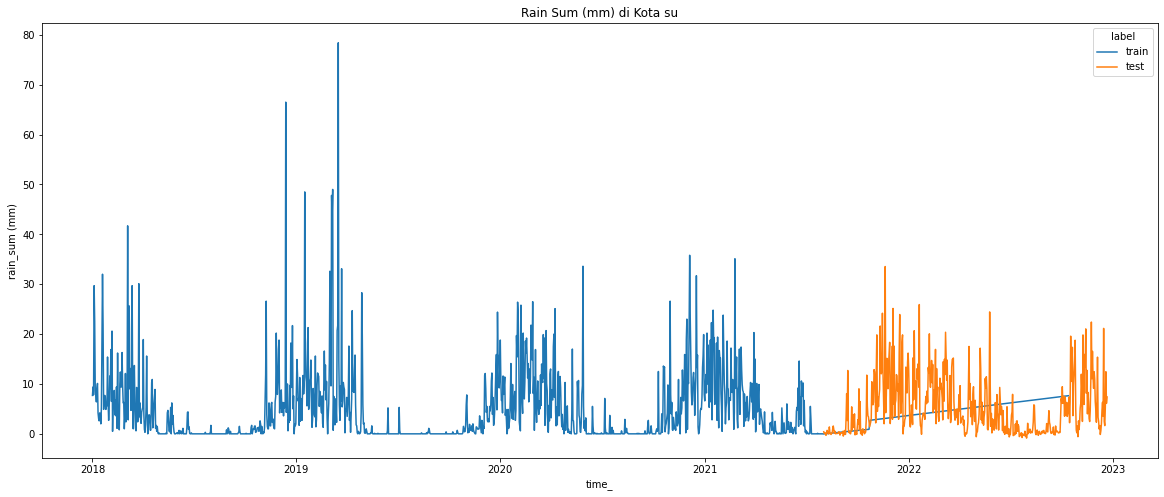

<Figure size 432x288 with 0 Axes>

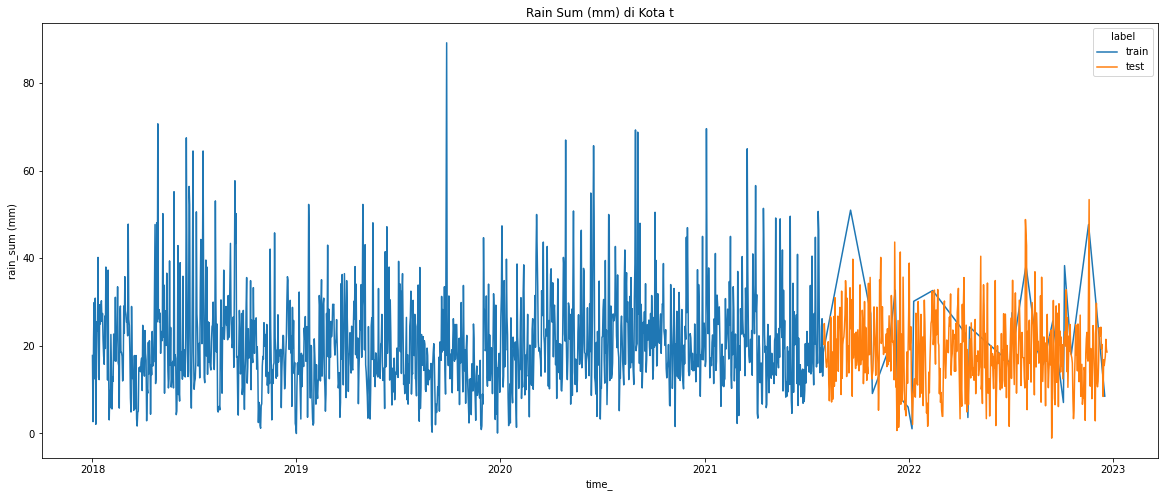

<Figure size 432x288 with 0 Axes>

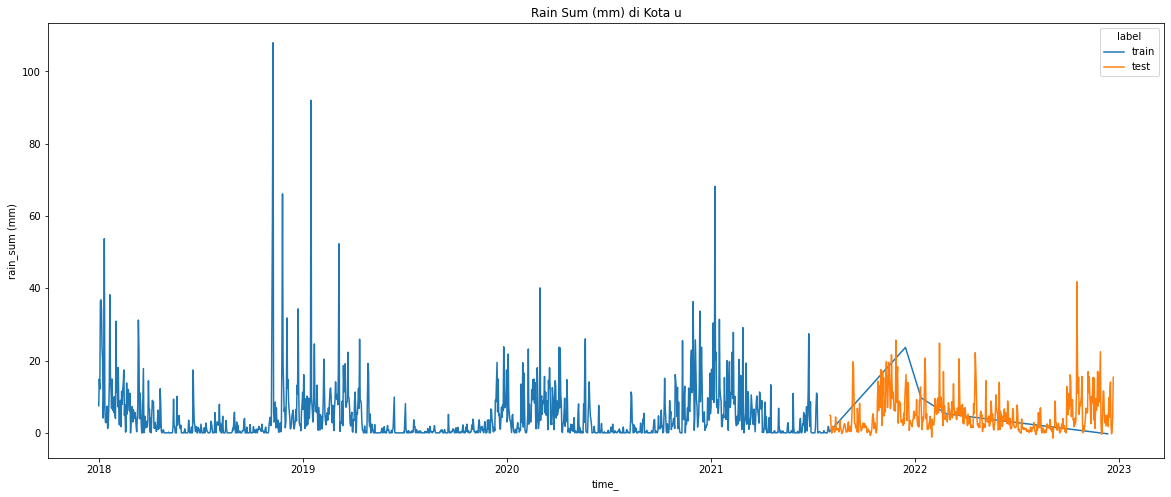

<Figure size 432x288 with 0 Axes>

In [ ]:
for x in df_["city"].unique() :
    df_city = df_[df_["city"]==x]
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.lineplot(x="time_",y="rain_sum (mm)",data=df_city,hue="label")
    plt.title("Rain Sum (mm) di Kota "+str(x))
    plt.show()
    plt.savefig("Rain Sum (mm) di Kota "+str(x)+".png")

In [ ]:
train.corr()["rain_sum (mm)"].reset_index().sort_values(by="rain_sum (mm)",ascending=False).head(10)

,index,rain_sum (mm)
5,rain_sum (mm),1.000000
750,mean_rain_city_month,0.630230
291,relativehumidity_2m (%)_13,0.564169
290,relativehumidity_2m (%)_12,0.562440
292,relativehumidity_2m (%)_14,0.558931
289,relativehumidity_2m (%)_11,0.554974
293,relativehumidity_2m (%)_15,0.552453
749,mean_rain_city,0.551104
288,relativehumidity_2m (%)_10,0.546693
294,relativehumidity_2m (%)_16,0.545087


## **Submission**

In [ ]:
submission = submission_.reset_index(drop=True)

In [ ]:
submission["id"]=submission["id"].astype(int)
submission = submission.drop(columns="index")

In [ ]:
submission

,id,rain_sum (mm)
0,0,0.417354
1,1,0.063349
2,2,0.112696
3,3,0.187529
4,4,-0.302550
...,...,...
4967,4967,-0.106980
4968,4968,1.181889
4969,4969,-0.409494
4970,4970,-0.295858


In [ ]:
submission.to_csv("submission.csv",index=False)